# Data Visulalization 

### import all packages

In [1]:
import pandas as pd                # importing pandas as pd
import numpy as np                 # importing numpy as np    
import matplotlib.pyplot as plt    #importing matplotlib as plt
import seaborn as sns              #importing seaborn as sns
%matplotlib inline
from datetime import date
from datetime import time

### Load the dataset

In [2]:
car_data=pd.read_csv("data_set.csv",encoding='ANSI')

### Remove all the insignificant columns


In [3]:
car_data.drop(['S_number','New_Price'],axis=1,inplace=True)
car_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage(kmpl)', 'Engine(CC)',
       'Power(bhp)', 'Seats', 'Price', 'paint_color', 'type', 'condition'],
      dtype='object')

### Remove all duplicates

In [4]:
car_data.drop_duplicates(inplace=True)

### Remove blank rows  

In [5]:
car_data.dropna(axis=0,how='all',inplace=True)

### first 10 rows of dataset

In [6]:
print(car_data.shape)
car_data.head(5)

(6019, 15)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(CC),Power(bhp),Seats,Price,paint_color,type,condition
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,blue,other,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50,blue,convertible,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50,blue,NaN,excellent
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,orange,SUV,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74,NaN,NaN,NaN


### Change some column names using rename() function

In [7]:
car_data.rename(columns={'Year':'Year_of_Registration',  
                             'Kilometers_Driven':'Odometer_Reading',
                             'Transmission':'Transmission_Type',
                             'Mileage(kmpl)':'Mileage_in_kmpl',
                             'Engine(CC)':'Engine_in_cc',
                             'Power(bhp)':'Power_in_bhp',
                             'Seats':'Number_of_seats',
                             'Price':'Price_in_lakh'},                         
                   inplace=True)
car_data.columns

Index(['Name', 'Location', 'Year_of_Registration', 'Odometer_Reading',
       'Fuel_Type', 'Transmission_Type', 'Owner_Type', 'Mileage_in_kmpl',
       'Engine_in_cc', 'Power_in_bhp', 'Number_of_seats', 'Price_in_lakh',
       'paint_color', 'type', 'condition'],
      dtype='object')

# Read and examine a dataset and classify variables by their type: quantitative vs. categorical

### read data

In [8]:
car_data_dup=car_data[['Fuel_Type','Transmission_Type','Odometer_Reading','Mileage_in_kmpl']]
car_data_dup.head()

,Fuel_Type,Transmission_Type,Odometer_Reading,Mileage_in_kmpl
0,CNG,Manual,72000,26.60
1,Diesel,Manual,41000,19.67
2,Petrol,Manual,46000,18.20
3,Diesel,Manual,87000,20.77
4,Diesel,Automatic,40670,15.20


### data info

In [9]:
car_data_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          6019 non-null   object 
 1   Transmission_Type  6019 non-null   object 
 2   Odometer_Reading   6019 non-null   int64  
 3   Mileage_in_kmpl    6017 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 235.1+ KB


 Out of four given attributes -:
     
     1. Fuel_Type and Transmission_Type are Categorical variables
     2. Odometer_Reading and Mileage_in_kmpl are Quantitaive variables.


# Handle categorical variables with numerically coded values

### Info about Categorical variables

In [10]:
print(car_data_dup['Fuel_Type'].value_counts())
print(car_data_dup['Fuel_Type'].dtype)
print("\n")
print(car_data_dup['Transmission_Type'].value_counts())
print(car_data_dup['Transmission_Type'].dtype)

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
object


Manual       4299
Automatic    1720
Name: Transmission_Type, dtype: int64
object


 handling categorical variables with numerical variables -:

    1. For Fuel_Type, create new column "Fuel_Type_id" which handles categorical data as numerical data.    
        
        0 <- CNG
        1 <- Diesel
        2 <- Electric
        3 <- LPG
        4 <- Petrol
    
    2. For Transmission_Type, create new column "Transmission_Type_id" which handles categorical data as numerical data.
    
        0 <- Automatic
        1 <- Manual
    
    
    

### handling categorical variables with numerically coded values

In [11]:
car_data_dup['Fuel_Type_id']=pd.Categorical(car_data_dup.Fuel_Type).codes
car_data_dup['Transmission_Type_id']=pd.Categorical(car_data_dup.Transmission_Type).codes
car_data_dup.head(10)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Fuel_Type,Transmission_Type,Odometer_Reading,Mileage_in_kmpl,Fuel_Type_id,Transmission_Type_id
0,CNG,Manual,72000,26.60,0,1
1,Diesel,Manual,41000,19.67,1,1
2,Petrol,Manual,46000,18.20,4,1
3,Diesel,Manual,87000,20.77,1,1
4,Diesel,Automatic,40670,15.20,1,0
5,LPG,Manual,75000,21.10,3,1
6,Diesel,Manual,86999,23.08,1,1
7,Diesel,Automatic,36000,11.36,1,0
8,Diesel,Manual,64430,20.54,1,1
9,Diesel,Manual,65932,22.30,1,1


# Perform univariate and bivariate analysis and derive meaningful insights about the dataset

## Univariate Analysis

### Univariate analysis of Transmission_Type 

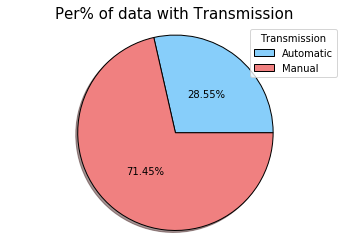

In [12]:
Rang=['lightskyblue','lightcoral']
plt.pie(car_data_dup.groupby('Transmission_Type').count()['Mileage_in_kmpl'],
        colors=Rang,
        autopct='%1.2f%%',
        pctdistance=0.5,
        shadow=True,
        wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True}
       )
plt.axis('equal') 
Transmission=['Automatic','Manual']
plt.legend(Transmission,title="Transmission",loc='upper right')
plt.title('Per% of data with Transmission',color='black',size=15)
plt.show()

### univariate analysis of Fuel_Type

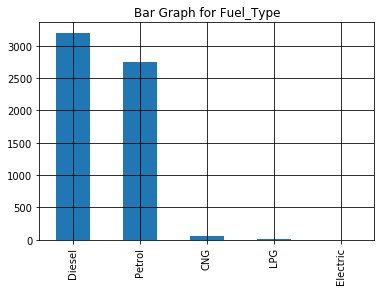

In [13]:
car_data_dup['Fuel_Type'].value_counts().plot.bar(title='Bar Graph for Fuel_Type')
plt.grid(color='black')
plt.show()

### univariate analysis of Odometer_Reading and Mileage_in_kmpl

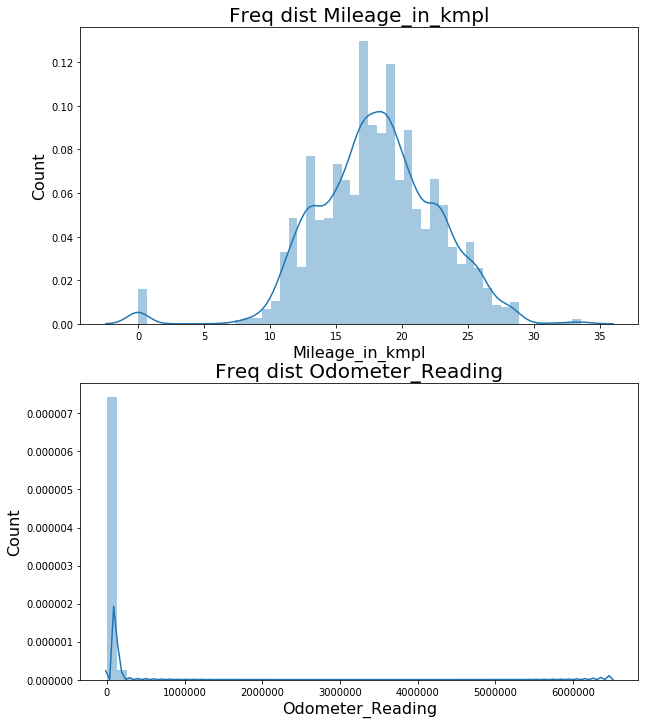

In [14]:
col_names = ['Mileage_in_kmpl','Odometer_Reading']
temp, x = plt.subplots(len(col_names), figsize=(10,12))
for i,col_val in enumerate(col_names): 
    sns.distplot(car_data_dup[col_val], hist=True, ax=x[i])
    x[i].set_title('Freq dist '+col_val, fontsize=20)
    x[i].set_xlabel(col_val, fontsize=16)
    x[i].set_ylabel('Count', fontsize=16)
plt.show()

## Bivariate Analysis

### bivariate analysis with respect to Transmission_Type 

<Figure size 1440x2880 with 0 Axes>

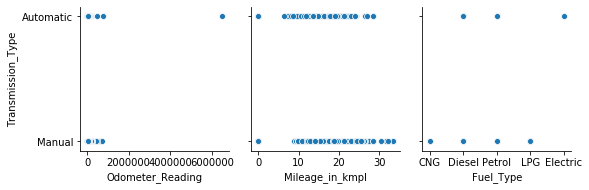

In [15]:
plt.figure(figsize=(20,40))
pp = sns.pairplot(data=car_data_dup,
                  y_vars=['Transmission_Type'],
                  x_vars=['Odometer_Reading', 'Mileage_in_kmpl', 'Fuel_Type'])

### bivariate analysis with respect to Odometer_reading

<Figure size 720x864 with 0 Axes>

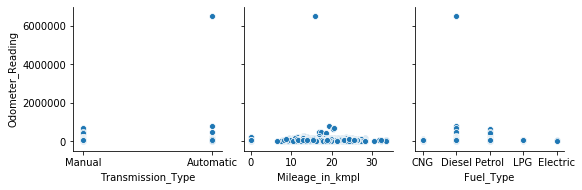

In [16]:
plt.figure(figsize=(10,12))
pp = sns.pairplot(data=car_data_dup,
                  y_vars=['Odometer_Reading'],
                  x_vars=['Transmission_Type', 'Mileage_in_kmpl', 'Fuel_Type'])

### bivariate analysis with respect to Miles_in_kmpl

<Figure size 720x864 with 0 Axes>

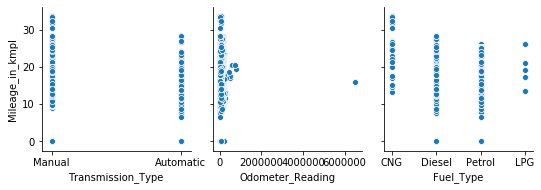

In [17]:
plt.figure(figsize=(10,12))
pp = sns.pairplot(data=car_data_dup,
                  y_vars=['Mileage_in_kmpl'],
                  x_vars=['Transmission_Type', 'Odometer_Reading', 'Fuel_Type'])

### bivariate analysis with respect to Fuel_Type

<Figure size 720x864 with 0 Axes>

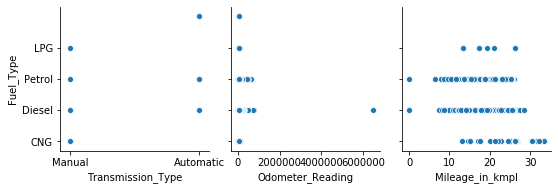

In [18]:
plt.figure(figsize=(10,12))
pp = sns.pairplot(data=car_data_dup,
                  y_vars=['Fuel_Type'],
                  x_vars=['Transmission_Type', 'Odometer_Reading', 'Mileage_in_kmpl'])

# Identify and treat missing values and remove dataset outliers

## Identify and treat missing values

### identify missing values

In [19]:
car_data_dup.isnull().sum()

Fuel_Type               0
Transmission_Type       0
Odometer_Reading        0
Mileage_in_kmpl         2
Fuel_Type_id            0
Transmission_Type_id    0
dtype: int64

### treat missing values

In [20]:
car_data_dup.fillna(0,inplace=True)
car_data_dup.isnull().sum()

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Fuel_Type               0
Transmission_Type       0
Odometer_Reading        0
Mileage_in_kmpl         0
Fuel_Type_id            0
Transmission_Type_id    0
dtype: int64

## Remove outliners


### outlier detection analysis

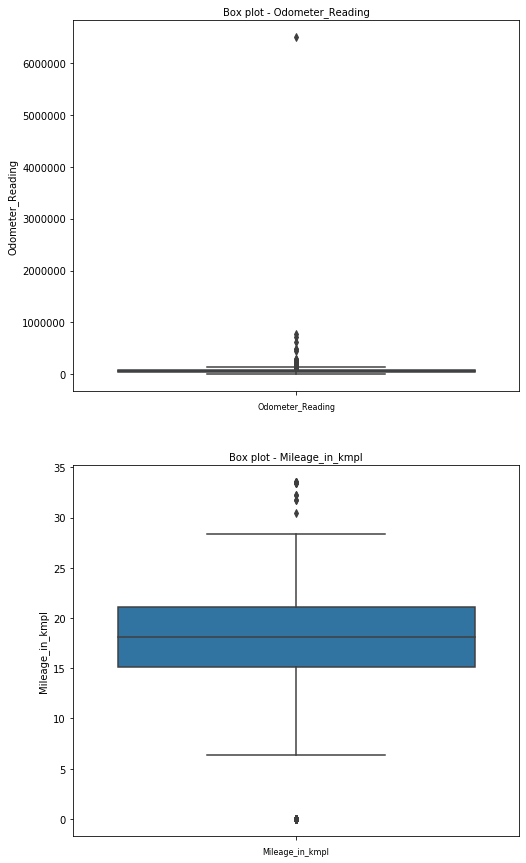

In [21]:
temp = car_data_dup[['Odometer_Reading','Mileage_in_kmpl']]
x = ['Odometer_Reading','Mileage_in_kmpl']
fig, ax = plt.subplots(len(x), figsize=(8,15))

for i, col_val in enumerate(x):
    sns.boxplot(y=temp[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

### percentile based outliers removal

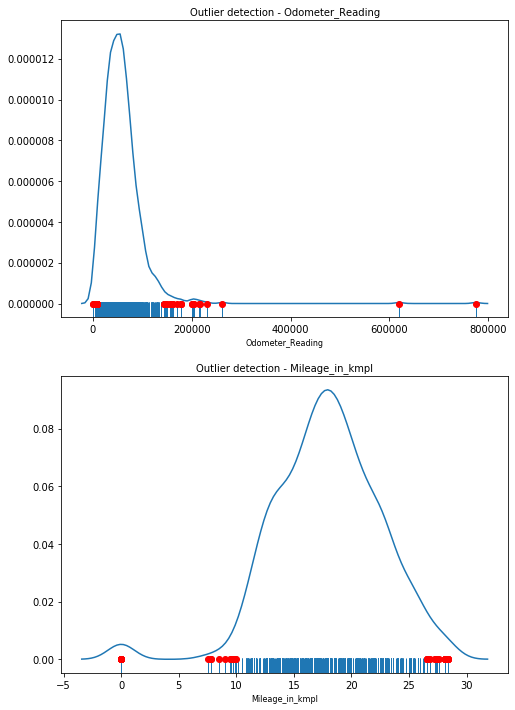

In [22]:

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

names = ['Odometer_Reading','Mileage_in_kmpl']
fig, ax = plt.subplots(len(names), figsize=(8,12))

for i, col_val in enumerate(names):
    xx = temp[col_val][:1000]
    sns.distplot(xx, ax=ax[i], rug=True, hist=False)
    outliers = xx[percentile_based_outlier(xx)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


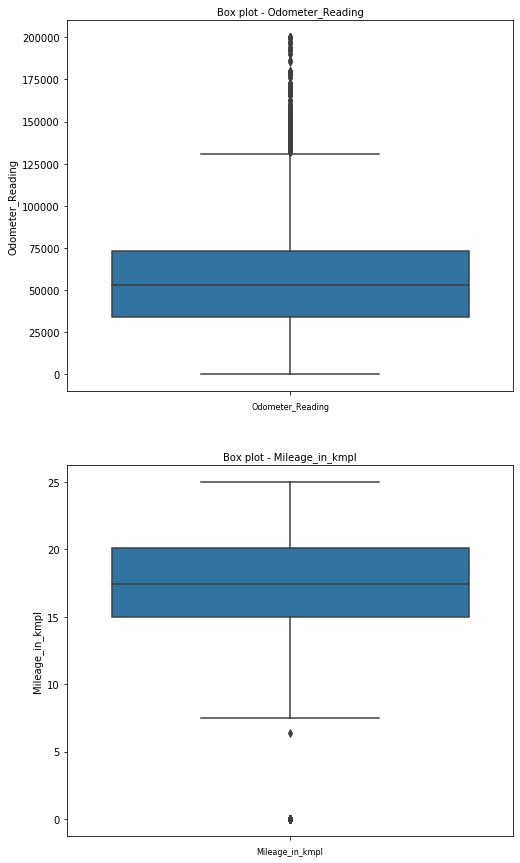

In [25]:
# outliners removal in odometer_reading
car_data_dup['Odometer_Reading'] = np.where(car_data_dup['Odometer_Reading'] > 200000, 100000, car_data_dup['Odometer_Reading'])
# outliners removal in mileage_in_kmpl
car_data_dup['Mileage_in_kmpl'] = np.where(car_data_dup['Mileage_in_kmpl'] > 25 , 15, car_data_dup['Mileage_in_kmpl'])
temp = car_data_dup[['Odometer_Reading','Mileage_in_kmpl']]
x = ['Odometer_Reading','Mileage_in_kmpl']
fig, ax = plt.subplots(len(x), figsize=(8,15))

for i, col_val in enumerate(x):
    sns.boxplot(y=temp[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

# Build a correlation matrix to identify relevant variables ( Graph )

## Build a correlation matrix

In [26]:
corrMatrix=car_data_dup.corr()
corrMatrix

,Odometer_Reading,Mileage_in_kmpl,Fuel_Type_id,Transmission_Type_id
Odometer_Reading,1.000000,-0.146687,-0.254131,0.120469
Mileage_in_kmpl,-0.146687,1.000000,-0.017281,0.270123
Fuel_Type_id,-0.254131,-0.017281,1.000000,0.125219
Transmission_Type_id,0.120469,0.270123,0.125219,1.000000


## Graph of Correlation

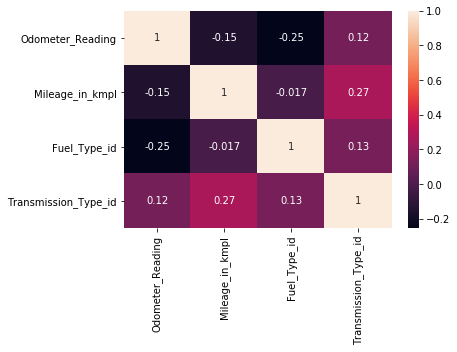

In [27]:
sns.heatmap(corrMatrix, annot=True)
plt.show()